## Семинар 9. Однофакторный дисперсионный анализ для связанных выборок.

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
%matplotlib inline

In [3]:
from scipy.stats import friedmanchisquare
from statsmodels.stats.anova import AnovaRM

In [5]:
import pingouin as pg

/opt/anaconda3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/anaconda3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.3, the latest is 0.3.10.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


### Задача №1

Несколько дегустаторов оценивают различные сорта вин. Имеют ли вина значимые отличия на уровне значимости 5%? Данные представлены в файле «Wine.csv».

In [4]:
data = pd.read_csv('Wine.csv', index_col='tasters') 
data.columns.name = 'wine' #индексу по столбцам присвоили имя 'wine' (понадобится в AnovaRM)

In [8]:
data.head()

wine,Georges Duboeuf Gamay,Williams Selyem Pinot Noir,Siduri Pinot Noir,Testarossa Pinot Noir,Louis Latour Chardonnay,Dr. Loosen Riesling,Louis Latour Pinot Noir,Testarossa Chardonnay
tasters,,,,,,,,
Roger Voss,78.9,76.7,78.3,76.9,79.2,79.4,79.6,78.0
Michael Schachner,80.5,80.1,80.9,79.4,81.4,79.3,79.8,78.2
Kerin O’Keefe,80.8,79.1,80.8,79.8,80.2,78.3,80.0,80.7
Virginie Boone,81.0,79.1,81.3,81.3,80.9,80.2,81.1,80.4
Paul Gregutt,81.0,81.1,80.5,79.5,79.9,81.8,80.6,79.8


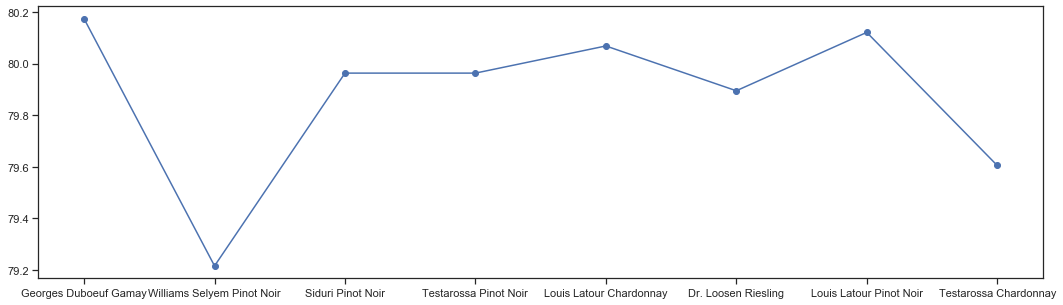

In [10]:
plt.figure(figsize=(18,5))
plt.plot(data.mean(axis=0), marker='o') 
# смотрим среднее по столбцам (axis=0), т.е. по винам
pass

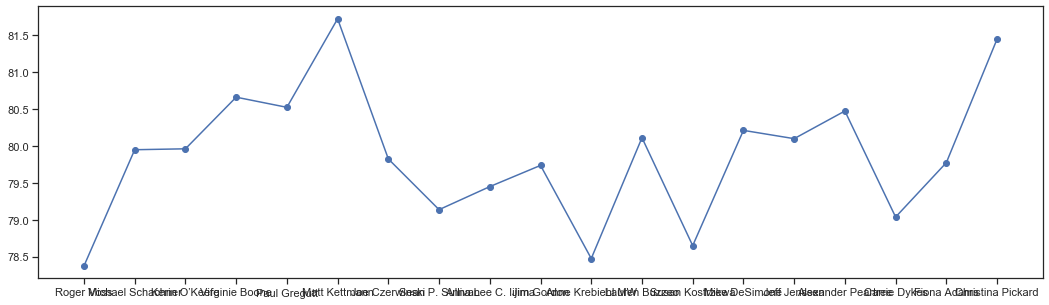

In [11]:
plt.figure(figsize=(18,5))
plt.plot(data.mean(axis=1), marker='o')
# смотрим среднее по строкам (axis=1), т.е. по дегустаторам

#### Критерий Фридмана (Friedman test)

In [12]:
friedmanchisquare?

#В описании теста указано, что аргумент теста должен быть в виде:
#measurements1, measurements2, measurements3... (Arrays of measurements)

In [13]:
data_ar = np.array(data) #делаем array из DataFrame (array из строк!! таблицы)
data_ar[0] #1 строка = 1 дегустатор

array([78.9, 76.7, 78.3, 76.9, 79.2, 79.4, 79.6, 78. ])

In [14]:
data_ar.T[0] #1 строка = 1 вино

array([78.9, 80.5, 80.8, 81. , 81. , 81.5, 79.2, 80. , 81. , 81. , 78.9,
       79.4, 78. , 82.4, 80.2, 78.8, 80.2, 78.6, 81.9])

In [15]:
friedmanchisquare(data_ar.T) 

ValueError: Less than 3 levels.  Friedman test not appropriate.

In [16]:
friedmanchisquare(*data_ar.T) 
#data_ar.T: транспонируем
#*data_ar.T: отправляем data_ar.T как набор строк=отдельных аргументов теста (т.е. набор измерений по каждому вину)

FriedmanchisquareResult(statistic=8.341740226986122, pvalue=0.30342606953219087)

#### Подготовка к AnovaRM

#### Mauchly's sphericity test

In [17]:
pg.sphericity(data) #по умолчанию сравниваем столбцы (иначе транспонируем)

(True, 0.175, 26.975, 27, 0.4819525968487766)

In [18]:
spher_res = pg.sphericity(data)
spher_res[4]

0.4819525968487766

#### Normality test

"One-way repeated measures ANOVA. The residual is calculated as Actual value - Predicted value, where Predicted value = predicted group mean + predicted subject (row) mean - predicted grand mean."

In [19]:
resid = data.add(-data.mean(axis=0), axis='columns').add(-data.mean(axis=1), axis='rows') + data.values.mean()

#data.add(-data.mean(axis=0), axis='columns') :прибавляем отдельно по столбцам значение -data.mean(axis=0)
#data.add(-data.mean(axis=1), axis='rows') :прибавляем построчно значение -data.mean(axis=1)

In [20]:
type(resid)

pandas.core.frame.DataFrame

In [21]:
#st.shapiro(resid.values.reshape(1, -1))

(0.9909800291061401, 0.4461417496204376)

In [22]:
st.shapiro(resid)

(0.9909800291061401, 0.4461417496204376)

#### AnovaRM

С помощью statsmodels.stats.anova:

In [23]:
#Придется преобразовать данные для AnovaRM:
#Было: data
data.head(2)

wine,Georges Duboeuf Gamay,Williams Selyem Pinot Noir,Siduri Pinot Noir,Testarossa Pinot Noir,Louis Latour Chardonnay,Dr. Loosen Riesling,Louis Latour Pinot Noir,Testarossa Chardonnay
tasters,,,,,,,,
Roger Voss,78.9,76.7,78.3,76.9,79.2,79.4,79.6,78.0
Michael Schachner,80.5,80.1,80.9,79.4,81.4,79.3,79.8,78.2


In [27]:
#Шаг 1: data.unstack()
data.unstack().head() #двухуровневый индекс (wine tasters), получили series (1 столбец со сложным индексом)

wine                   tasters          
Georges Duboeuf Gamay  Roger Voss           78.9
                       Michael Schachner    80.5
                       Kerin O’Keefe        80.8
                       Virginie Boone       81.0
                       Paul Gregutt         81.0
dtype: float64

In [28]:
#Шаг 2: data.unstack().to_frame(name='score') 
data.unstack().to_frame(name='score').head() #получили DataFrame, добавили название 'score' для столбца с качеством вина

score
wine                  tasters                 
Georges Duboeuf Gamay Roger Voss          78.9
                      Michael Schachner   80.5
                      Kerin O’Keefe       80.8
                      Virginie Boone      81.0
                      Paul Gregutt        81.0

In [29]:
#Шаг 3: data.unstack().to_frame(name='score').reset_index()
data_anova = data.unstack().to_frame(name='score').reset_index() #превратили индексы в значения ячеек
#теперь в качестве индекса выступают числа 0,1,2,3...

In [30]:
data_anova.head()

,wine,tasters,score
0,Georges Duboeuf Gamay,Roger Voss,78.9
1,Georges Duboeuf Gamay,Michael Schachner,80.5
2,Georges Duboeuf Gamay,Kerin O’Keefe,80.8
3,Georges Duboeuf Gamay,Virginie Boone,81.0
4,Georges Duboeuf Gamay,Paul Gregutt,81.0


In [31]:
an_rm = AnovaRM(data_anova, depvar='score', subject='tasters', within=['wine'])

In [32]:
res = an_rm.fit()
print(res)

               Anova
     F Value Num DF  Den DF  Pr > F
-----------------------------------
wine  1.9613 7.0000 126.0000 0.0654



Или с помощью pingouin:

In [34]:
pg.rm_anova(data)

,Source,ddof1,ddof2,F,p-unc,np2,eps
0,Within,7,126,1.961,0.065437,0.098,0.747


In [35]:
#Или можно так же передать data_anova, как в AnovaRM:
pg.rm_anova(data=data_anova, dv='score', within='wine', subject='tasters', detailed=False)

,Source,ddof1,ddof2,F,p-unc,np2,eps
0,wine,7,126,1.961,0.065437,0.098,0.747


In [36]:
rmanova_res = pg.rm_anova(data)
rmanova_res['p-unc'][0]

0.0654368069545985

### Задача №2

Несколько дегустаторов оценивают различные вина, расположенные по увеличению стоимости за бутылку. Имеют ли вина значимые отличия на уровне значимости 5%? Данные представлены в файле «Wine_Page.csv».

In [37]:
data_page = pd.read_csv('Wine_Page.csv', index_col='tasters') 
data_page.columns.name = 'wine' #индексу по столбцам присвоили имя 'wine' 

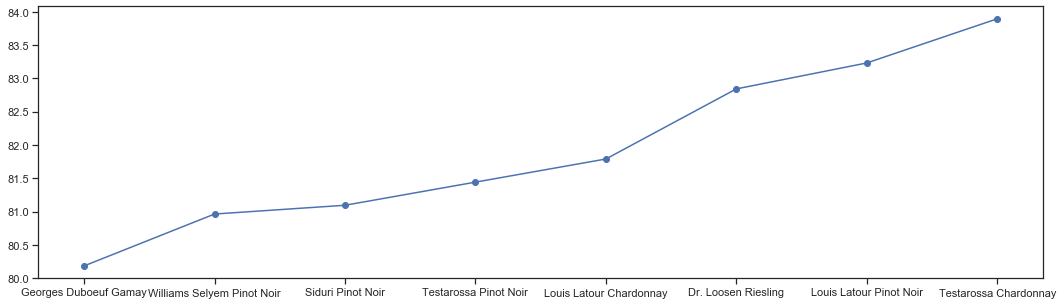

In [38]:
plt.figure(figsize=(18,5))
plt.plot(data_page.mean(axis=0), marker='o') 
# смотрим среднее по столбцам (axis=0), т.е. по винам

#### Критерий Пэйджа (Page's trend test)

In [39]:
%%bash
git clone https://github.com/jwcarr/PageTest

fatal: destination path 'PageTest' already exists and is not an empty directory.


CalledProcessError: Command 'b'git clone https://github.com/jwcarr/PageTest\n'' returned non-zero exit status 128.

In [40]:
from PageTest import Page

In [41]:
Page.test(np.array(data_page).tolist(), ascending=True)
#Data matrix (formated as a list of lists) with treatments along the columns and replications along the rows.

(3725.0, 19, 8, 0.0)

Return values:

L float: Page’s L statistic

m int: Number of replications (по строкам)

n int: Number of treatments (по столбцам)

p float: P-value